# 집단별 요약 시각화

In [28]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
from hossam import load_data
import numpy as np

In [29]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [30]:
origin = load_data('penguins')
origin

[data] https://data.hossam.kr/data/lab06/penguins.xlsx
[desc] 남극 팔머 군도의 펭귄 3종에 대해 신체 치수와 서식지 정보(출처: seaborn 내장 데이터)

field              description
-----------------  -------------
species            팽귄 종
island             서식지
bill_length_mm     부리 길이
bill_depth_mm      부리 두께
flipper_length_mm  날개 길이
body_mass_g        몸무게
sex                성별



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
...,...,...,...,...,...,...,...
329,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
330,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
331,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
332,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


## barplot

- 집단별 평균/합계/비율의 요약 통계 시각화의 기본형
- 'estimator' 파라미터로 평균(mean)외에도 median, sum 등 자유롭게 설정가능
- 범주형 분석에서 가장 표준적으로 쓰이는 그래프
- 가장 범용적이고, 이외의 그래프는 특정 포인트를 보여주기위해 쓰인다

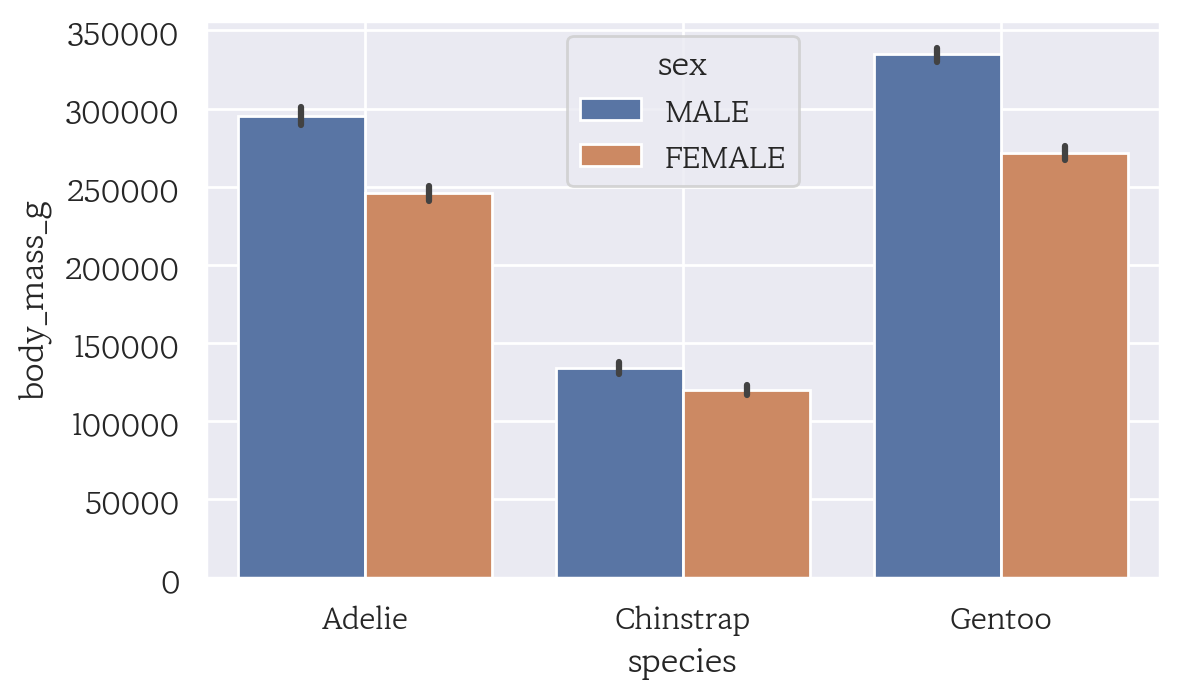

In [31]:
width_px = 1200
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.barplot(data=origin,              # 사용할 데이터프레임
           x = 'species',            # 막대의 카테고리축
           y ='body_mass_g',         # 요약할 수치변수
           hue ='sex',               # 그룹 구분: None, 'sex', 'island'....
           estimator =np.sum)        # 요약 방식: np.mean, np.median

ax.grid(True)

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()
# 그래프에 보이는 검은색 막대기: 다른 값으로 평균, 합계등을 내도 이 수준에 머무를 것이다를 보여주는 말.

## countplot (빈도 그래프)

- 범주형 빈도(Count)를 바로 보여주는 가장 단순하고 직관적인 요약 그래프)


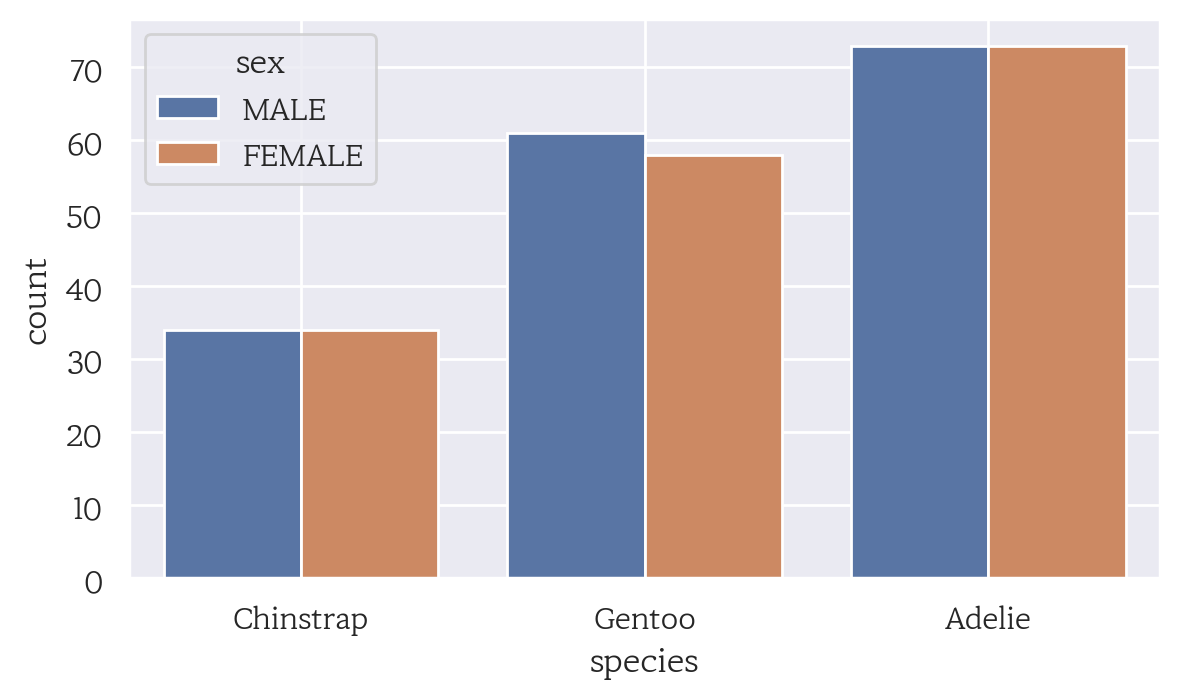

In [ ]:
width_px = 1200
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.countplot(data=origin,
             x ='species',
             hue ='sex',
             order =['Chinstrap','Gentoo','Adelie'],
             hue_order = ['MALE','FEMALE']                         
          )       

ax.grid(True)

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

## pointplot

- 점 + 오차막대 형태의 집단별 평균 + 신뢰구간 요약
- 여러 그룹(hue) 비교시 가장 깔끔하고 해석성이 높음
- 회귀분석 전 EDA에서 추세 파악용으로 인기

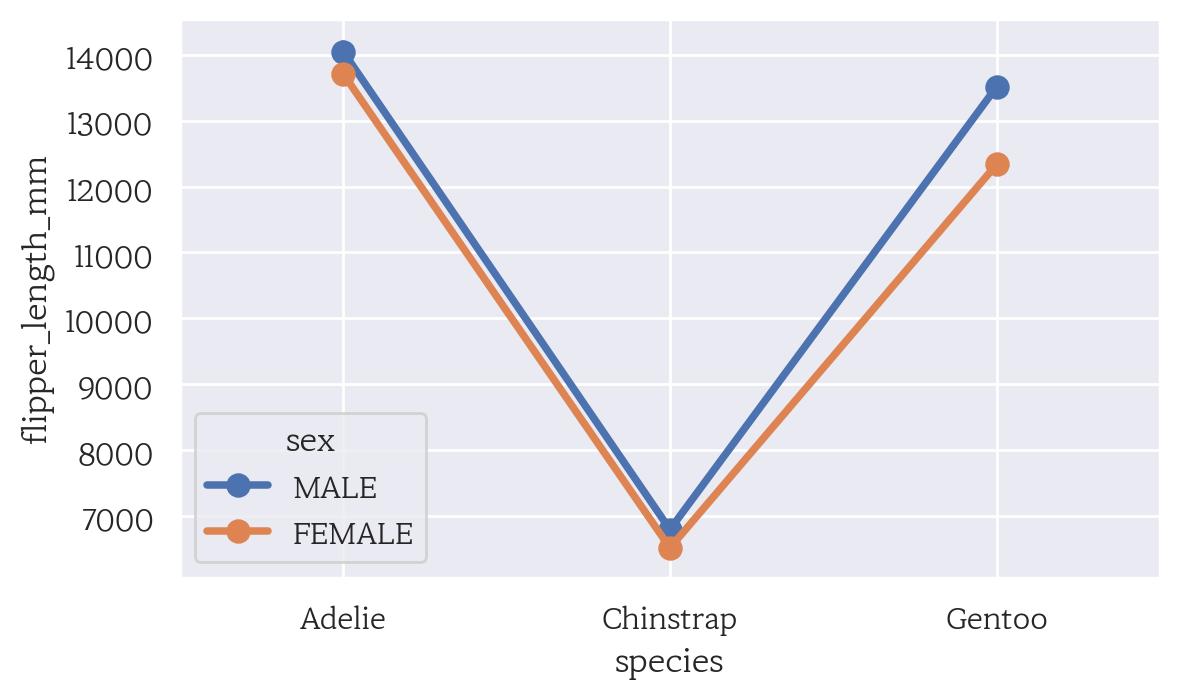

In [ ]:
width_px = 1200
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.pointplot(data=origin,            # 사용할 데이터프레임
           x = 'species',            # 막대의 카테고리축
           y ='flipper_length_mm',   # 요약할 수치변수
           hue ='sex',               # 그룹 구분: None, 'sex', 'island'....
           estimator =np.sum)        # 요약 방식: np.mean, np.median

ax.grid(True)

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()